***
## Table of Contents
<br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">1. HTTP</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#1.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a></h2>
        <ul><a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#2.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

<br>
    <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">3. HTTPS</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Loading Data </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Feature Selection </h3></a>
            </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Splitting Training and Test Data For Selected Features </h3></a>
           </ul>
        <ul>
            <a href='#3.D' style="text-decoration : none; color : #000000;"><h3>D. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#3.E' style="text-decoration : none; color : #000000;"><h3>E. Results </h3></a>
            </ul>
     </ol>
     <br>
      <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">4. HTTPS with PCA</a></h2>
        <ul><a href='#4.A' style="text-decoration : none; color : #000000;"><h3>A. Classification using different methods </h3></a>
            </ul>
            <ul>
            <a href='#4.B' style="text-decoration : none; color : #000000;"><h3>B. Results </h3></a>
            </ul>
            <ul>
             <a href='#4.C' style="text-decoration : none; color : #000000;"><h3> C. % variance eplained by selected features</h3> </a> </ul>
     </ol>
<br>

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=3,verbose=True)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    display(cm_train)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    display(cm_test)
    fpr, tpr, threshold = roc_curve(y_test, grid_search.predict(x_test))
    roc_auc =auc(fpr, tpr)
    return grid_search,cm_train,cm_test,acc_train,acc_test,roc_auc  

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

## <a id='1' style="text-decoration : none; color : #000000;"> HTTP</a>

### <a id='1.A' style="text-decoration : none; color : #000000;">A. Loading Data</a>

In [6]:
df_alex=pd.read_csv('Javascript_alexa_output_final_http.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_http.csv',low_memory=False)

df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)


# df.to_csv('Javascript_dom.csv')

df.head()

df_non=df[df.Malicious==0]
df_mal=df[df.Malicious==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)
df_u.Malicious.value_counts() 
X=df_u.loc[:,df.columns!='Malicious']
X.drop(['number_of_unsecure_cookies','number_of_secure_cookies','number_of_non_http_only_cookies','number_of_http_only_cookies',
 'number_of_cookies'],axis=1,inplace=True)
y=df_u.Malicious.values
feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (12574, 407)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

### <a id='1.B' style="text-decoration : none; color : #000000;">B. Feature Selection</a>

<ol>
    <ul><h4> 1. Correlation</h4></ul>
    <ul><h4> 2. Chi2 </h4></ul>
    <ul><h4> 3. Recursive Feature Elimination </h4></ul>
    <ul><h4> 4. Select From Model </h4></ul>
</ol>

In [7]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y)


X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()


rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=False)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()


embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()


feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Splitting Training and Test Data For Selected Features </a>

In [8]:
X=df_u[feature_selection_df[feature_selection_df.Total==4]['Feature']]
y=df_u.Malicious.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(12574, 70)

#### C.1 List of features selected

In [9]:
feature_name

['number_functions_declared',
 'js_function_unescape(',
 'js_function_parseInt(',
 'js_function_escape(',
 'js_function_encodeURIComponent(',
 'js_function_encodeURI(',
 'js_function_decodeURIComponent(',
 'js_function_String.fromCharCode(',
 'js_function_Object.keys(',
 'js_function_Object.getOwnPropertyNames(',
 'js_function_Math.round(',
 'js_function_Math.random(',
 'js_function_Math.min(',
 'js_function_Math.max(',
 'js_function_Math.floor(',
 'js_function_JSON.parse(',
 'js_function_Date.now(',
 'js_function_.trim(',
 'js_function_.toString(',
 'js_function_.toLowerCase(',
 'js_function_.test(',
 'js_function_.substring(',
 'js_function_.substr',
 'js_function_.split(',
 'js_function_.splice(',
 'js_function_.shift(',
 'js_function_.setTime(',
 'js_function_.search(',
 'js_function_.reverse(',
 'js_function_.replace(',
 'js_function_.push(',
 'js_function_.propertyIsEnumerable(',
 'js_function_.min(',
 'js_function_.match(',
 'js_function_.log(',
 'js_function_.lastIndexOf(',
 'j

### <a id='1.D' style="text-decoration : none; color : #000000;"> D. Classification using different methods </a>

In [10]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### D.1. Deep Learning

In [11]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.883885078069194


Predicted  False  True  __all__
Actual                         
False       4096   960     5056
True         208  4795     5003
__all__     4304  5755    10059

The accuracy of the model on test data is: 0.8779324055666003


Predicted  False  True  __all__
Actual                         
False        982   249     1231
True          58  1226     1284
__all__     1040  1475     2515

#### D.2. KNN

In [12]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8849786261059748


Predicted  False  True  __all__
Actual                         
False       4137   919     5056
True         238  4765     5003
__all__     4375  5684    10059

The accuracy of the model on test data is: 0.88389662027833


Predicted  False  True  __all__
Actual                         
False        995   236     1231
True          56  1228     1284
__all__     1051  1464     2515

#### D.3. Logistics

In [13]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8123073864201212


Predicted  False  True  __all__
Actual                         
False       3405  1651     5056
True         237  4766     5003
__all__     3642  6417    10059

The accuracy of the model on test data is: 0.8170974155069582


Predicted  False  True  __all__
Actual                         
False        821   410     1231
True          50  1234     1284
__all__      871  1644     2515

#### D.4. Random Forest Classifier

In [14]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9031712893925837


Predicted  False  True  __all__
Actual                         
False       4181   875     5056
True          99  4904     5003
__all__     4280  5779    10059

The accuracy of the model on test data is: 0.8858846918489066


Predicted  False  True  __all__
Actual                         
False        995   236     1231
True          51  1233     1284
__all__     1046  1469     2515

#### D.5. AdaBoost Classifier

In [15]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8555522417735362


Predicted  False  True  __all__
Actual                         
False       4014  1042     5056
True         411  4592     5003
__all__     4425  5634    10059

The accuracy of the model on test data is: 0.858051689860835


Predicted  False  True  __all__
Actual                         
False        960   271     1231
True          86  1198     1284
__all__     1046  1469     2515

#### D.6. GradientBoosting Classifier

In [16]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8788149915498559


Predicted  False  True  __all__
Actual                         
False       4153   903     5056
True         316  4687     5003
__all__     4469  5590    10059

The accuracy of the model on test data is: 0.8803180914512923


Predicted  False  True  __all__
Actual                         
False        996   235     1231
True          66  1218     1284
__all__     1062  1453     2515

#### D.7. Extra Tree Classifier

In [17]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9065513470523909


Predicted  False  True  __all__
Actual                         
False       4199   857     5056
True          83  4920     5003
__all__     4282  5777    10059

The accuracy of the model on test data is: 0.8882703777335984


Predicted  False  True  __all__
Actual                         
False       1001   230     1231
True          51  1233     1284
__all__     1052  1463     2515

#### D.8. Bagging Classifier

In [18]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9036683566954966


Predicted  False  True  __all__
Actual                         
False       4189   867     5056
True         102  4901     5003
__all__     4291  5768    10059

The accuracy of the model on test data is: 0.882703777335984


Predicted  False  True  __all__
Actual                         
False        986   245     1231
True          50  1234     1284
__all__     1036  1479     2515

#### D.9. Voting Classifier

In [19]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.9005865394174372


Predicted  False  True  __all__
Actual                         
False       4194   862     5056
True         138  4865     5003
__all__     4332  5727    10059

The accuracy of the model on test data is: 0.8894632206759443


Predicted  False  True  __all__
Actual                         
False       1003   228     1231
True          50  1234     1284
__all__     1053  1462     2515

### <a id='1.E' style="text-decoration : none; color : #000000;"> E. Results </a>

In [20]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.883885,4795.0,4096.0,960.0,208.0,0.189873,0.041575
KNeighborsClassifier,0.884979,4765.0,4137.0,919.0,238.0,0.181764,0.047571
LogisticRegression,0.812307,4766.0,3405.0,1651.0,237.0,0.326543,0.047372
RandomForestClassifier,0.903171,4904.0,4181.0,875.0,99.0,0.173062,0.019788
AdaBoostClassifier,0.855552,4592.0,4014.0,1042.0,411.0,0.206092,0.082151
GradientBoostingClassifier,0.878815,4687.0,4153.0,903.0,316.0,0.178600,0.063162
ExtraTreeClassifier,0.906551,4920.0,4199.0,857.0,83.0,0.169502,0.016590
BaggingClassifier,0.903668,4901.0,4189.0,867.0,102.0,0.171479,0.020388
VotingClassifier,0.900587,4865.0,4194.0,862.0,138.0,0.170491,0.027583


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.877932,1226.0,982.0,249.0,58.0,0.202275,0.045171,0.876277
KNeighborsClassifier,0.883897,1228.0,995.0,236.0,56.0,0.191714,0.043614,0.882336
LogisticRegression,0.817097,1234.0,821.0,410.0,50.0,0.333063,0.038941,0.813998
RandomForestClassifier,0.885885,1233.0,995.0,236.0,51.0,0.191714,0.039720,0.884283
AdaBoostClassifier,0.858052,1198.0,960.0,271.0,86.0,0.220146,0.066978,0.856438
GradientBoostingClassifier,0.880318,1218.0,996.0,235.0,66.0,0.190902,0.051402,0.878848
ExtraTreeClassifier,0.888270,1233.0,1001.0,230.0,51.0,0.186840,0.039720,0.886720
BaggingClassifier,0.882704,1234.0,986.0,245.0,50.0,0.199025,0.038941,0.881017
VotingClassifier,0.889463,1234.0,1003.0,228.0,50.0,0.185215,0.038941,0.887922


## <a id='2' style="text-decoration : none; color : #000000;">2. HTTP with PCA</a>

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A. Classification using different methods</a>

In [25]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [27]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
pca=PCA(n_components=48,random_state=0)
X_pca=pca.fit_transform(scaled_X)
print(sum(pca.explained_variance_ratio_))
print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,y,random_state=0,test_size=0.2)

X_pca.shape

0.9241518099346635
The train/test split ratio is 80:20


(12574, 48)

#### A.1. Deep Learning

In [28]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_pca.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.8848792126750197


Predicted  False  True  __all__
Actual                         
False       4119   937     5056
True         221  4782     5003
__all__     4340  5719    10059

The accuracy of the model on test data is: 0.8807157057654076


Predicted  False  True  __all__
Actual                         
False        989   242     1231
True          58  1226     1284
__all__     1047  1468     2515

#### A.2. KNN

In [29]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8833880107366537


Predicted  False  True  __all__
Actual                         
False       4108   948     5056
True         225  4778     5003
__all__     4333  5726    10059

The accuracy of the model on test data is: 0.8831013916500994


Predicted  False  True  __all__
Actual                         
False        989   242     1231
True          52  1232     1284
__all__     1041  1474     2515

#### A.3. Logistics

In [30]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8033601749676906


Predicted  False  True  __all__
Actual                         
False       3323  1733     5056
True         245  4758     5003
__all__     3568  6491    10059

The accuracy of the model on test data is: 0.8091451292246521


Predicted  False  True  __all__
Actual                         
False        806   425     1231
True          55  1229     1284
__all__      861  1654     2515

#### A.4. Random Forest Classifier

In [31]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9032707028531664


Predicted  False  True  __all__
Actual                         
False       4180   876     5056
True          97  4906     5003
__all__     4277  5782    10059

The accuracy of the model on test data is: 0.8878727634194831


Predicted  False  True  __all__
Actual                         
False       1002   229     1231
True          53  1231     1284
__all__     1055  1460     2515

#### A.5. AdaBoost Classifier

In [32]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.878317924246943


Predicted  False  True  __all__
Actual                         
False       4189   867     5056
True         357  4646     5003
__all__     4546  5513    10059

The accuracy of the model on test data is: 0.8846918489065606


Predicted  False  True  __all__
Actual                         
False       1014   217     1231
True          73  1211     1284
__all__     1087  1428     2515

#### A.6. GradientBoosting Classifier

In [33]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8864698280147132


Predicted  False  True  __all__
Actual                         
False       4203   853     5056
True         289  4714     5003
__all__     4492  5567    10059

The accuracy of the model on test data is: 0.8882703777335984


Predicted  False  True  __all__
Actual                         
False       1013   218     1231
True          63  1221     1284
__all__     1076  1439     2515

#### A.7. Extra Tree Classifier

In [34]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9065513470523909


Predicted  False  True  __all__
Actual                         
False       4199   857     5056
True          83  4920     5003
__all__     4282  5777    10059

The accuracy of the model on test data is: 0.8878727634194831


Predicted  False  True  __all__
Actual                         
False       1000   231     1231
True          51  1233     1284
__all__     1051  1464     2515

#### A.8. Bagging Classifier

In [35]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.9032707028531664


Predicted  False  True  __all__
Actual                         
False       4191   865     5056
True         108  4895     5003
__all__     4299  5760    10059

The accuracy of the model on test data is: 0.8882703777335984


Predicted  False  True  __all__
Actual                         
False       1002   229     1231
True          52  1232     1284
__all__     1054  1461     2515

#### A.9. Voting Classifier

In [36]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.9002882990356894


Predicted  False  True  __all__
Actual                         
False       4180   876     5056
True         127  4876     5003
__all__     4307  5752    10059

The accuracy of the model on test data is: 0.890258449304175


Predicted  False  True  __all__
Actual                         
False       1006   225     1231
True          51  1233     1284
__all__     1057  1458     2515

### <a id='2.B' style="text-decoration : none; color : #000000;"> B. Results </a>

In [37]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.884879,4782.0,4119.0,937.0,221.0,0.185324,0.044173
KNeighborsClassifier,0.883388,4778.0,4108.0,948.0,225.0,0.187500,0.044973
LogisticRegression,0.803360,4758.0,3323.0,1733.0,245.0,0.342761,0.048971
RandomForestClassifier,0.903271,4906.0,4180.0,876.0,97.0,0.173259,0.019388
AdaBoostClassifier,0.878318,4646.0,4189.0,867.0,357.0,0.171479,0.071357
GradientBoostingClassifier,0.886470,4714.0,4203.0,853.0,289.0,0.168710,0.057765
ExtraTreeClassifier,0.906551,4920.0,4199.0,857.0,83.0,0.169502,0.016590
BaggingClassifier,0.903271,4895.0,4191.0,865.0,108.0,0.171084,0.021587
VotingClassifier,0.900288,4876.0,4180.0,876.0,127.0,0.173259,0.025385


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.880716,1226.0,989.0,242.0,58.0,0.196588,0.045171,0.879120
KNeighborsClassifier,0.883101,1232.0,989.0,242.0,52.0,0.196588,0.040498,0.881457
LogisticRegression,0.809145,1229.0,806.0,425.0,55.0,0.345248,0.042835,0.805959
RandomForestClassifier,0.887873,1231.0,1002.0,229.0,53.0,0.186028,0.041277,0.886348
AdaBoostClassifier,0.884692,1211.0,1014.0,217.0,73.0,0.176279,0.056854,0.883433
GradientBoostingClassifier,0.888270,1221.0,1013.0,218.0,63.0,0.177092,0.049065,0.886921
ExtraTreeClassifier,0.887873,1233.0,1000.0,231.0,51.0,0.187652,0.039720,0.886314
BaggingClassifier,0.888270,1232.0,1002.0,229.0,52.0,0.186028,0.040498,0.886737
VotingClassifier,0.890258,1233.0,1006.0,225.0,51.0,0.182778,0.039720,0.888751


### <a id='2.C' style="text-decoration : none; color : #000000;"> C. % variance eplained by selected features </a> 

In [38]:
pca_inv_data = pca.components_
lst=[]
lst.append((np.square(pca_inv_data.std(axis=0)),X.columns))
pca_df=pd.DataFrame(np.square(pca_inv_data.std(axis=0)))
pca_df['features']=X.columns
pca_df.columns=['% Variance explained by each feature','Features']
pca_df['% Variance explained by each feature']=pca_df['% Variance explained by each feature']
pca_df.sort_values(by='% Variance explained by each feature',ascending=False,inplace=True)
pca_df

,% Variance explained by each feature,Features
5,0.020612,js_function_encodeURI(
55,0.020425,dom_function_window.matchMedia(
64,0.020346,dom_function_document.getElementsByClassName(
66,0.020318,dom_function_document.execCommand(
2,0.020222,js_function_parseInt(
56,0.020182,dom_function_window.getSelection(
16,0.019950,js_function_Date.now(
53,0.019925,dom_function_window.setTimeout(
62,0.019882,dom_function_document.open(
15,0.019639,js_function_JSON.parse(


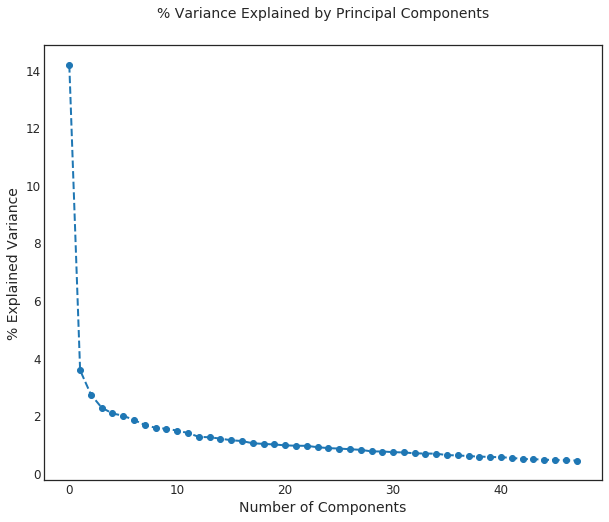

In [39]:
sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


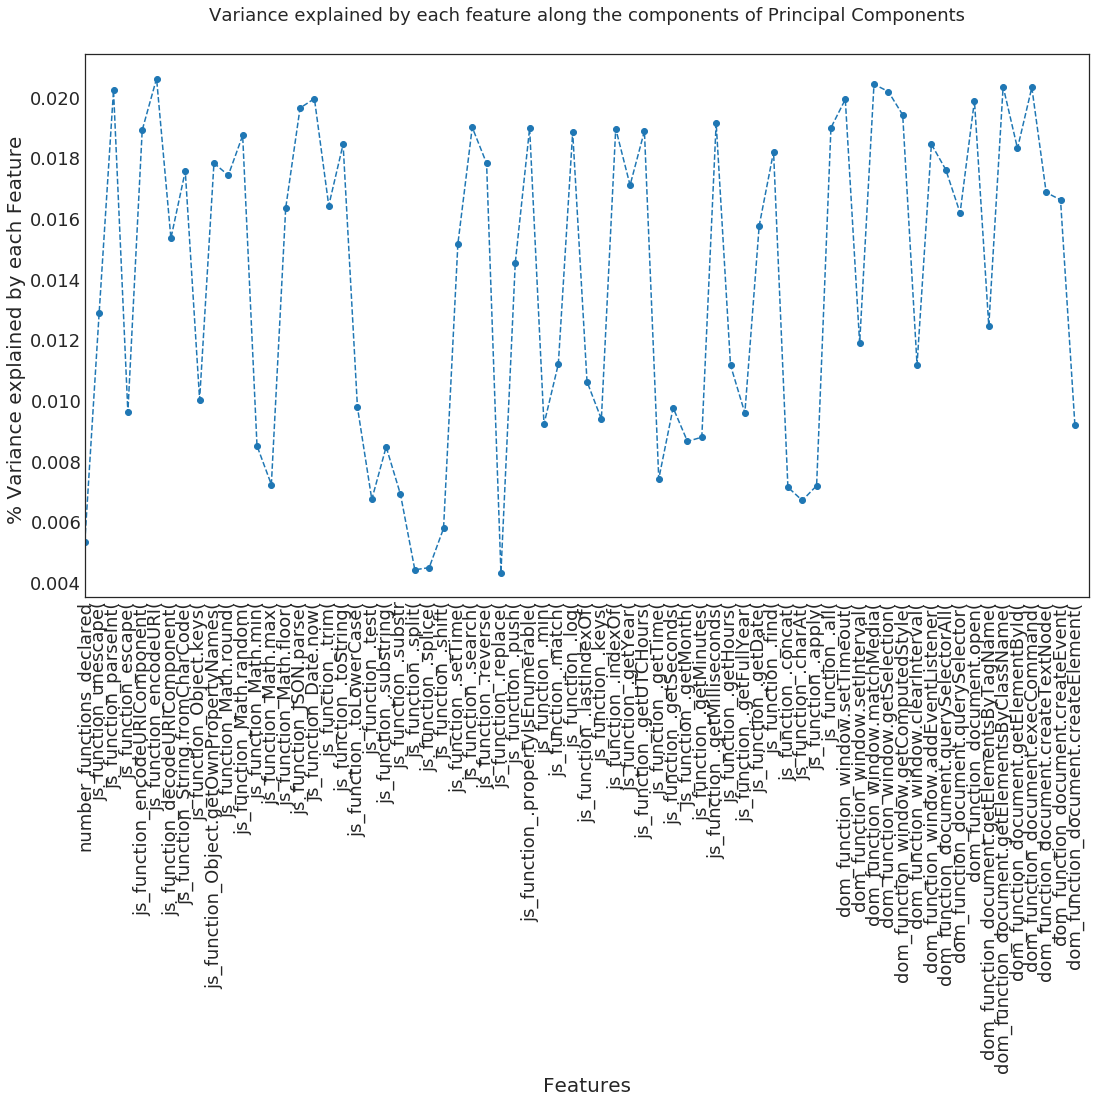

In [40]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, X.shape[1]])
plt.xticks(np.arange(X.shape[1]),feature_name,rotation=90)
plt.title('Variance explained by each feature along the components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

## <a id='3' style="text-decoration : none; color : #000000;"> HTTPS</a>

### <a id='3.A' style="text-decoration : none; color : #000000;">A. Loading Data</a>

In [42]:
df_alex=pd.read_csv('Javascript_alexa_output_final_https.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_https.csv',low_memory=False)

df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)

df_non=df[df.Malicious==0]
df_mal=df[df.Malicious==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)
df_u.Malicious.value_counts() 
X=df_u.loc[:,df.columns!='Malicious']
X.drop(['number_of_unsecure_cookies','number_of_secure_cookies','number_of_non_http_only_cookies','number_of_http_only_cookies',
 'number_of_cookies'],axis=1,inplace=True)
y=df_u.Malicious.values
feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (12714, 407)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

### <a id='3.B' style="text-decoration : none; color : #000000;">B. Feature Selection</a>

<ol>
    <ul><h4> 1. Correlation</h4></ul>
    <ul><h4> 2. Chi2 </h4></ul>
    <ul><h4> 3. Recursive Feature Elimination </h4></ul>
    <ul><h4> 4. Select From Model </h4></ul>
</ol>

In [43]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y)


X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()


rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=False)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()


embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()


feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

### <a id='3.C' style="text-decoration : none; color : #000000;"> C. Splitting Training and Test Data For Selected Features </a>

In [44]:
X=df_u[feature_selection_df[feature_selection_df.Total==4]['Feature']]
y=df_u.Malicious.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(12714, 69)

#### C.1 List of features selected

In [45]:
feature_name

['number_functions_declared',
 'js_function_unescape(',
 'js_function_parseInt(',
 'js_function_eval(',
 'js_function_escape(',
 'js_function_encodeURIComponent(',
 'js_function_decodeURIComponent(',
 'js_function_decodeURI(',
 'js_function_String.fromCharCode(',
 'js_function_Promise.resolve(',
 'js_function_Math.round(',
 'js_function_Math.random(',
 'js_function_Math.max(',
 'js_function_Math.floor(',
 'js_function_JSON.stringify(',
 'js_function_JSON.parse(',
 'js_function_Date.now(',
 'js_function_.trim(',
 'js_function_.toLowerCase(',
 'js_function_.test(',
 'js_function_.substring(',
 'js_function_.substr',
 'js_function_.split(',
 'js_function_.splice(',
 'js_function_.setTime(',
 'js_function_.setDate(',
 'js_function_.select(',
 'js_function_.replace(',
 'js_function_.propertyIsEnumerable(',
 'js_function_.pop(',
 'js_function_.log(',
 'js_function_.lastIndexOf(',
 'js_function_.keys(',
 'js_function_.join(',
 'js_function_.indexOf(',
 'js_function_.hasOwnProperty(',
 'js_fun

### <a id='3.D' style="text-decoration : none; color : #000000;"> D. Classification using different methods </a>

In [46]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### D.1. Deep Learning

In [47]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.798446563736268


Predicted  False  True  __all__
Actual                         
False       3179  1951     5130
True          99  4942     5041
__all__     3278  6893    10171

The accuracy of the model on test data is: 0.794337396775462


Predicted  False  True  __all__
Actual                         
False        742   485     1227
True          38  1278     1316
__all__      780  1763     2543

#### D.2. KNN

In [48]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8059187887130076


Predicted  False  True  __all__
Actual                         
False       3320  1810     5130
True         164  4877     5041
__all__     3484  6687    10171

The accuracy of the model on test data is: 0.8010224144710971


Predicted  False  True  __all__
Actual                         
False        772   455     1227
True          51  1265     1316
__all__      823  1720     2543

#### D.3. Logistics

In [49]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.7709173139317668


Predicted  False  True  __all__
Actual                         
False       2921  2209     5130
True         121  4920     5041
__all__     3042  7129    10171

The accuracy of the model on test data is: 0.7782147070389304


Predicted  False  True  __all__
Actual                         
False        694   533     1227
True          31  1285     1316
__all__      725  1818     2543

#### D.4. Random Forest Classifier

In [50]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8159473011503293


Predicted  False  True  __all__
Actual                         
False       3337  1793     5130
True          79  4962     5041
__all__     3416  6755    10171

The accuracy of the model on test data is: 0.799842705465985


Predicted  False  True  __all__
Actual                         
False        766   461     1227
True          48  1268     1316
__all__      814  1729     2543

#### D.5. AdaBoost Classifier

In [51]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.7979549700127815


Predicted  False  True  __all__
Actual                         
False       3261  1869     5130
True         186  4855     5041
__all__     3447  6724    10171

The accuracy of the model on test data is: 0.7927644514353126


Predicted  False  True  __all__
Actual                         
False        754   473     1227
True          54  1262     1316
__all__      808  1735     2543

#### D.6. GradientBoosting Classifier

In [52]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8037557762265264


Predicted  False  True  __all__
Actual                         
False       3319  1811     5130
True         185  4856     5041
__all__     3504  6667    10171

The accuracy of the model on test data is: 0.7970900511207235


Predicted  False  True  __all__
Actual                         
False        765   462     1227
True          54  1262     1316
__all__      819  1724     2543

#### D.7. Extra Tree Classifier

In [53]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.817422082391112


Predicted  False  True  __all__
Actual                         
False       3339  1791     5130
True          66  4975     5041
__all__     3405  6766    10171

The accuracy of the model on test data is: 0.8002359418010224


Predicted  False  True  __all__
Actual                         
False        768   459     1227
True          49  1267     1316
__all__      817  1726     2543

#### D.8. Bagging Classifier

In [54]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8152590699046308


Predicted  False  True  __all__
Actual                         
False       3331  1799     5130
True          80  4961     5041
__all__     3411  6760    10171

The accuracy of the model on test data is: 0.7959103421156115


Predicted  False  True  __all__
Actual                         
False        758   469     1227
True          50  1266     1316
__all__      808  1735     2543

#### D.9. Voting Classifier

In [55]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8134893324156917


Predicted  False  True  __all__
Actual                         
False       3340  1790     5130
True         107  4934     5041
__all__     3447  6724    10171

The accuracy of the model on test data is: 0.8018088871411718


Predicted  False  True  __all__
Actual                         
False        773   454     1227
True          50  1266     1316
__all__      823  1720     2543

### <a id='3.E' style="text-decoration : none; color : #000000;"> E. Results </a>

In [56]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.798447,4942.0,3179.0,1951.0,99.0,0.380312,0.019639
KNeighborsClassifier,0.805919,4877.0,3320.0,1810.0,164.0,0.352827,0.032533
LogisticRegression,0.770917,4920.0,2921.0,2209.0,121.0,0.430604,0.024003
RandomForestClassifier,0.815947,4962.0,3337.0,1793.0,79.0,0.349513,0.015671
AdaBoostClassifier,0.797955,4855.0,3261.0,1869.0,186.0,0.364327,0.036897
GradientBoostingClassifier,0.803756,4856.0,3319.0,1811.0,185.0,0.353021,0.036699
ExtraTreeClassifier,0.817422,4975.0,3339.0,1791.0,66.0,0.349123,0.013093
BaggingClassifier,0.815259,4961.0,3331.0,1799.0,80.0,0.350682,0.015870
VotingClassifier,0.813489,4934.0,3340.0,1790.0,107.0,0.348928,0.021226


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.794337,1278.0,742.0,485.0,38.0,0.395273,0.028875,0.787926
KNeighborsClassifier,0.801022,1265.0,772.0,455.0,51.0,0.370823,0.038754,0.795212
LogisticRegression,0.778215,1285.0,694.0,533.0,31.0,0.434393,0.023556,0.771025
RandomForestClassifier,0.799843,1268.0,766.0,461.0,48.0,0.375713,0.036474,0.793906
AdaBoostClassifier,0.792764,1262.0,754.0,473.0,54.0,0.385493,0.041033,0.786737
GradientBoostingClassifier,0.797090,1262.0,765.0,462.0,54.0,0.376528,0.041033,0.791219
ExtraTreeClassifier,0.800236,1267.0,768.0,459.0,49.0,0.374083,0.037234,0.794341
BaggingClassifier,0.795910,1266.0,758.0,469.0,50.0,0.382233,0.037994,0.789886
VotingClassifier,0.801809,1266.0,773.0,454.0,50.0,0.370008,0.037994,0.795999


## <a id='4' style="text-decoration : none; color : #000000;">4. HTTPS with PCA</a>

#### <a id='4.A' style="text-decoration : none; color : #000000;"> A. Classification using different methods</a>

In [57]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [59]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
pca=PCA(n_components=48,random_state=0)
X_pca=pca.fit_transform(scaled_X)
print(sum(pca.explained_variance_ratio_))
print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,y,random_state=0,test_size=0.2)

X_pca.shape

0.9290122044348431
The train/test split ratio is 80:20


(12714, 48)

#### A.1. Deep Learning

In [60]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.7969717824954854


Predicted  False  True  __all__
Actual                         
False       3184  1946     5130
True         119  4922     5041
__all__     3303  6868    10171

The accuracy of the model on test data is: 0.7935509241053873


Predicted  False  True  __all__
Actual                         
False        743   484     1227
True          41  1275     1316
__all__      784  1759     2543

#### A.2. KNN

In [61]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_train=knn.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",knn.score(X_train,Y_train))
cm_train=get_cm(knn,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,knn.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(knn,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,knn.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]= ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] = ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8070986137056336


Predicted  False  True  __all__
Actual                         
False       3333  1797     5130
True         165  4876     5041
__all__     3498  6673    10171

The accuracy of the model on test data is: 0.8022021234762092


Predicted  False  True  __all__
Actual                         
False        774   453     1227
True          50  1266     1316
__all__      824  1719     2543

#### A.3. Logistics

In [62]:
logistic=LogisticRegression()
logistic.fit(X_train,Y_train)
acc_train=logistic.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",logistic.score(X_train,Y_train))
cm_train=get_cm(logistic,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,logistic.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(logistic,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,logistic.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.7648215514698653


Predicted  False  True  __all__
Actual                         
False       2857  2273     5130
True         119  4922     5041
__all__     2976  7195    10171

The accuracy of the model on test data is: 0.7723161620133701


Predicted  False  True  __all__
Actual                         
False        679   548     1227
True          31  1285     1316
__all__      710  1833     2543

#### A.4. Random Forest Classifier

In [63]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8161439386491004


Predicted  False  True  __all__
Actual                         
False       3336  1794     5130
True          76  4965     5041
__all__     3412  6759    10171

The accuracy of the model on test data is: 0.8018088871411718


Predicted  False  True  __all__
Actual                         
False        772   455     1227
True          49  1267     1316
__all__      821  1722     2543

#### A.5. AdaBoost Classifier

In [64]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
acc_train=ada.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ada.score(X_train,Y_train))
cm_train=get_cm(ada,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ada.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ada,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ada.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8033625012289843


Predicted  False  True  __all__
Actual                         
False       3364  1766     5130
True         234  4807     5041
__all__     3598  6573    10171

The accuracy of the model on test data is: 0.7963035784506488


Predicted  False  True  __all__
Actual                         
False        781   446     1227
True          72  1244     1316
__all__      853  1690     2543

#### A.6. GradientBoosting Classifier

In [65]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
acc_train=gbc.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",gbc.score(X_train,Y_train))
cm_train=get_cm(gbc,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,gbc.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(gbc,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,gbc.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8082784386982598


Predicted  False  True  __all__
Actual                         
False       3343  1787     5130
True         163  4878     5041
__all__     3506  6665    10171

The accuracy of the model on test data is: 0.8018088871411718


Predicted  False  True  __all__
Actual                         
False        776   451     1227
True          53  1263     1316
__all__      829  1714     2543

#### A.7. Extra Tree Classifier

In [66]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.817422082391112


Predicted  False  True  __all__
Actual                         
False       3339  1791     5130
True          66  4975     5041
__all__     3405  6766    10171

The accuracy of the model on test data is: 0.8006291781360598


Predicted  False  True  __all__
Actual                         
False        769   458     1227
True          49  1267     1316
__all__      818  1725     2543

#### A.8. Bagging Classifier

In [67]:
bagging=BaggingClassifier()
bagging.fit(X_train,Y_train)
acc_train=bagging.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",bagging.score(X_train,Y_train))
cm_train=get_cm(bagging,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,bagging.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(bagging,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,bagging.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is:  0.8151607511552453


Predicted  False  True  __all__
Actual                         
False       3333  1797     5130
True          83  4958     5041
__all__     3416  6755    10171

The accuracy of the model on test data is: 0.8010224144710971


Predicted  False  True  __all__
Actual                         
False        771   456     1227
True          50  1266     1316
__all__      821  1722     2543

#### A.9. Voting Classifier

In [68]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The accuracy of the model on training data is :",acc_train)
display(cm_train)
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,eclf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR,auc])

The accuracy of the model on training data is : 0.8137842886638482


Predicted  False  True  __all__
Actual                         
False       3341  1789     5130
True         105  4936     5041
__all__     3446  6725    10171

The accuracy of the model on test data is: 0.8025953598112465


Predicted  False  True  __all__
Actual                         
False        775   452     1227
True          50  1266     1316
__all__      825  1718     2543

### <a id='4.B' style="text-decoration : none; color : #000000;"> B. Results </a>

In [69]:
table_80_50_train['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']
table_80_50_test['index']=['Neural Network-1','KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Training Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural Network-1,0.796972,4922.0,3184.0,1946.0,119.0,0.379337,0.023606
KNeighborsClassifier,0.807099,4876.0,3333.0,1797.0,165.0,0.350292,0.032732
LogisticRegression,0.764822,4922.0,2857.0,2273.0,119.0,0.443080,0.023606
RandomForestClassifier,0.816144,4965.0,3336.0,1794.0,76.0,0.349708,0.015076
AdaBoostClassifier,0.803363,4807.0,3364.0,1766.0,234.0,0.344250,0.046419
GradientBoostingClassifier,0.808278,4878.0,3343.0,1787.0,163.0,0.348343,0.032335
ExtraTreeClassifier,0.817422,4975.0,3339.0,1791.0,66.0,0.349123,0.013093
BaggingClassifier,0.815161,4958.0,3333.0,1797.0,83.0,0.350292,0.016465
VotingClassifier,0.813784,4936.0,3341.0,1789.0,105.0,0.348733,0.020829


Comparision Table for Test Accuracies:


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural Network-1,0.793551,1275.0,743.0,484.0,41.0,0.394458,0.031155,0.787193
KNeighborsClassifier,0.802202,1266.0,774.0,453.0,50.0,0.369193,0.037994,0.796406
LogisticRegression,0.772316,1285.0,679.0,548.0,31.0,0.446618,0.023556,0.764913
RandomForestClassifier,0.801809,1267.0,772.0,455.0,49.0,0.370823,0.037234,0.795971
AdaBoostClassifier,0.796304,1244.0,781.0,446.0,72.0,0.363488,0.054711,0.790900
GradientBoostingClassifier,0.801809,1263.0,776.0,451.0,53.0,0.367563,0.040274,0.796082
ExtraTreeClassifier,0.800629,1267.0,769.0,458.0,49.0,0.373268,0.037234,0.794749
BaggingClassifier,0.801022,1266.0,771.0,456.0,50.0,0.371638,0.037994,0.795184
VotingClassifier,0.802595,1266.0,775.0,452.0,50.0,0.368378,0.037994,0.796814


### <a id='4.C' style="text-decoration : none; color : #000000;"> C. % variance eplained by selected features </a> 

In [70]:
pca_inv_data = pca.components_
lst=[]
lst.append((np.square(pca_inv_data.std(axis=0)),X.columns))
pca_df=pd.DataFrame(np.square(pca_inv_data.std(axis=0)))
pca_df['features']=X.columns
pca_df.columns=['% Variance explained by each feature','Features']
pca_df['% Variance explained by each feature']=pca_df['% Variance explained by each feature']
pca_df.sort_values(by='% Variance explained by each feature',ascending=False,inplace=True)
pca_df

,% Variance explained by each feature,Features
58,0.020442,dom_function_window.clearInterval(
56,0.020428,dom_function_window.dispatchEvent(
16,0.020339,js_function_Date.now(
59,0.020327,dom_function_window.addEventListener(
3,0.020197,js_function_eval(
65,0.020190,dom_function_document.getElementById(
39,0.020160,js_function_.getSeconds(
60,0.020117,dom_function_document.write(
34,0.020067,js_function_.indexOf(
51,0.020015,dom_function_window.setInterval(


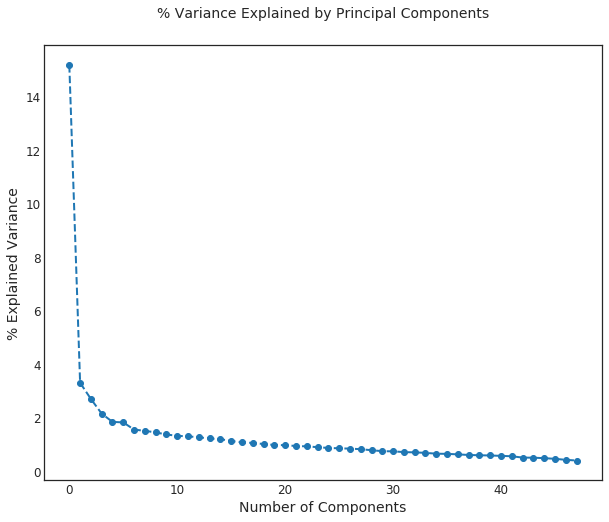

In [71]:
sns.set_style('white')
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


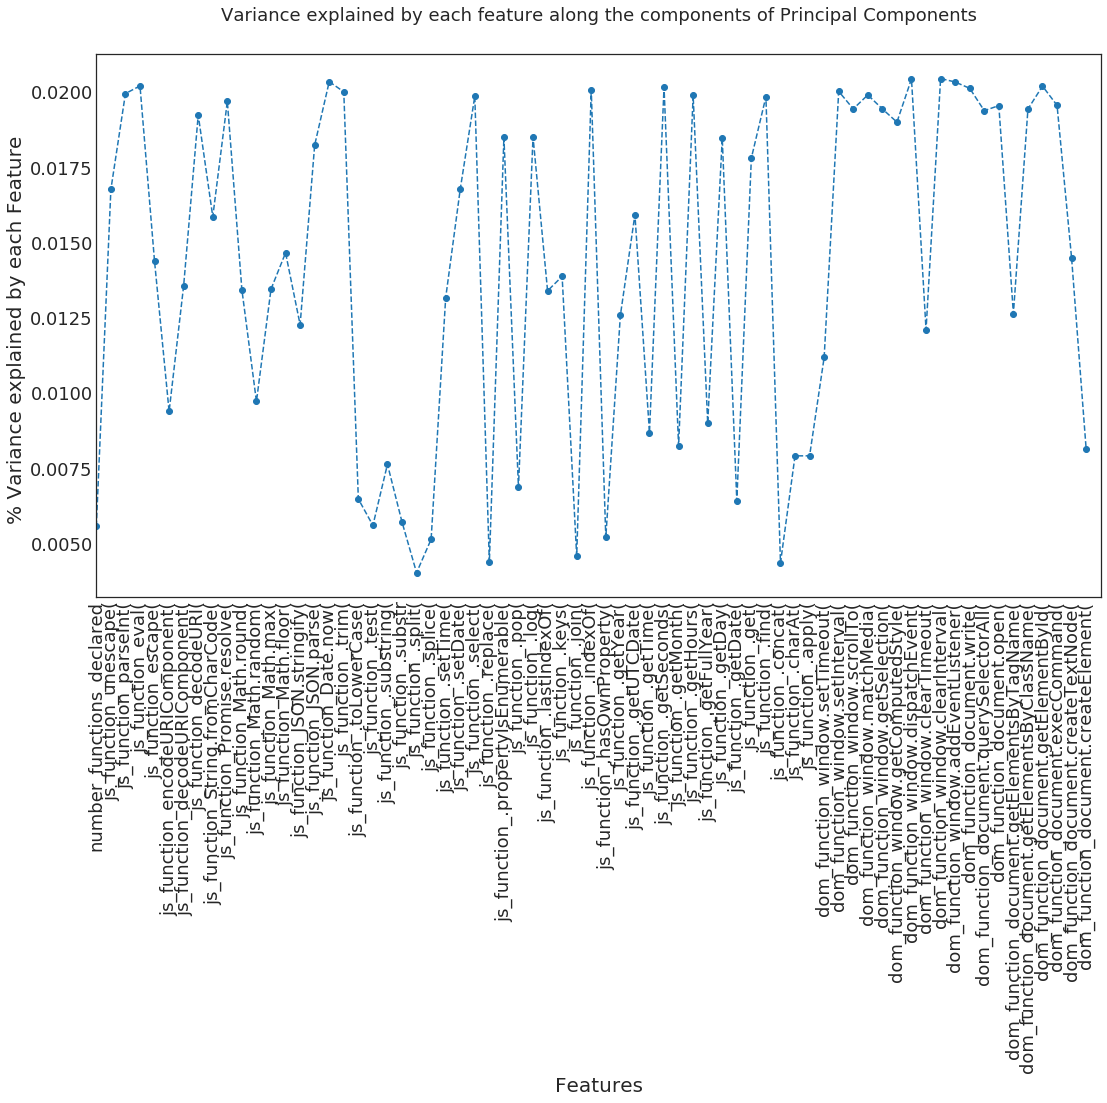

In [72]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, X.shape[1]])
plt.xticks(np.arange(X.shape[1]),feature_name,rotation=90)
plt.title('Variance explained by each feature along the components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

In [73]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')